In [1]:
import pandas as pd
import glob
pd.options.mode.chained_assignment = None 
import datetime
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [2]:
# PATHS

#Den Bosch flow
path = "../data/waterschap-aa-en-maas_sewage_2019/sewer_data/data_pump/RG8150/RG8150/"
path1 = "../data/waterschap-aa-en-maas_sewage_2019_db_pumps/sewer_data_db/data_wwtp_flow/RG1876_flow/"
path2 = "../data/waterschap-aa-en-maas_sewage_2019_db_pumps/sewer_data_db/data_wwtp_flow/RG1882_flow/"


#Bokhoven level
path3 = "../data/waterschap-aa-en-maas_sewage_2019/sewer_data/data_pump/RG8180_L0/" 
#Bokhoven flow
path4 = "../data/waterschap-aa-en-maas_sewage_2019/sewer_data/data_pump/RG8180_Q0/" 


#Haarsteeg level
path5 = "../data/waterschap-aa-en-maas-sewage_2019/sewer_data/data_pump/rg8170_N99/" 
#Haarsteeg flow
path6 = "../data/waterschap-aa-en-maas-sewage_2019/sewer_data/data_pump/rg8170_99/" 
#path6 = "../data/waterschap-aa-en-maas_sewage_2019/sewer_data/data_pump/rg8170_99/" 


#Helftheuvelweg level column 003 Helftheuvelweg *.csv
path7 = "../data/waterschap-aa-en-maas_sewage_2019_db/sewer_data_db/data_pump_level/" #path 7, 11, 13, 15 are the same
#Helftheuvelweg flow 
path8 = "../data/waterschap-aa-en-maas_sewage_2019_db/sewer_data_db/data_pump_flow/1210FIT301_99/"


#Engelerschans level column “004 Engelerschans” *.csv
path9 = "../data/waterschap-aa-en-maas_sewage_2019_db/sewer_data_db/data_pump_level/"
#Engelerschans flow + Haarsteeg + Bokhoven, therefore substract for only Engeleschans
path10 = "../data/waterschap-aa-en-maas_sewage_2019_db/sewer_data_db/data_pump_flow/1210FIT201_99/"


#Maaspoort level Column: “006 Maaspoort” *.csv 
path11 = "../data/waterschap-aa-en-maas_sewage_2019_db/sewer_data_db/data_pump_level/"
#Maasport flow + Rompert
path12= "../data/waterschap-aa-en-maas_sewage_2019_db/sewer_data_db/data_pump_flow/1210FIT501_99/" #path 12, 16 are the same


#Oude Engelenseweg level Column: “002 Oude Engelenseweg” *.csv
path13 = "../data/waterschap-aa-en-maas_sewage_2019_db/sewer_data_db/data_pump_level/"
#Oude Engelenseweg flow
path14 = "../data/waterschap-aa-en-maas_sewage_2019_db/sewer_data_db/data_pump_flow/1210FIT401_94/"


#De Rompert level Column: “005 de Rompert” *.csv
path15 = "../data/waterschap-aa-en-maas_sewage_2019_db/sewer_data_db/data_pump_level/"
#De Rompert flow + Maasport
path16 = "../data/waterschap-aa-en-maas_sewage_2019_db/sewer_data_db/data_pump_flow/1210FIT501_99/"

In [3]:
#Reading and rendering (One liner example)
#Use for example this flow data and the below rain data for Haarsteeg to experiment with visualizations
#Haarsteeg



#extention = 'csv'

#all_filenames = [i for i in glob.glob('*.{}'.format(extention))]

#combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ], ignore_index=True)

#combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')


#Emilyans code is below

#df = pd.concat([pd.read_csv(file) for file in glob.glob(path5+'/*.*')], ignore_index = True)

#df.to_csv(path5+"haarsteeg_l_comb.csv")

In [4]:
#Location linkage
path_linkinfo = "../data/waterschap-aa-en-maas_sewage_2019/sewer_model/"
path_rain = "../data/waterschap-aa-en-maas-sewage_2019/sewer_data/rain_timeseries/"

#Missing Engelerschans and RWZI Den Bosch linking streets inside the linking document(Someone revisit this please e.g @Roger)
#Another missing thing this time in the rainfall data itself are streets in "Hertogenbosch (Oude Engelenseweg)" and in "Hertogenbosch (Maaspoort)", if you want to
#see, plug "Hertogenbosch (Oude Engelenseweg)" or the other one in station_names to see exactly which streets are not in index
# THIS IS SOMETHING TO REPORT AS MISSING IN OUR DELIVERABLE!!!

station_names = ["Haarsteeg", "Bokhoven", "Hertogenbosch (Helftheuvelweg)", "Hertogenbosch (Rompert)"]
link = pd.read_csv("../data/waterschap-aa-en-maas-sewage_2019/sewer_model/20180717_dump riodat rioleringsdeelgebieden_matched_to_rainfall_locations.csv", header=9)

#Street names by stations
streets = [list(link[link["Naam kern"] == name]["Naam / lokatie"]) for name in station_names]

rain = pd.concat([pd.read_csv(file, header = 2) for file in glob.glob(path_rain+"*.*")], ignore_index = True)

#All the rain for the streets for the pump stations in order of station_names and the streets per station
#can be found in streets nested list in the same order


all_areas = rain[["Begin", "Eind"] + [i for sl in streets for i in sl]]


In [5]:
all_areas2 = pd.DataFrame()

for i in range(len(station_names)):
    all_areas2[station_names[i]] = rain[streets[i]].sum(1)

all_areas2["Begin"] =  all_areas["Begin"]
all_areas2["End"] = all_areas["Eind"]

In [6]:
all_areas2["Begin"] = pd.to_datetime(all_areas2["Begin"])
all_areas2["date"] = all_areas2["Begin"].dt.date

# The sum of the rain at all locations per day
all_areas2_days = all_areas2.groupby('date').sum()

In [7]:
def condition_days(rain_value): #conditions are made based on wikipedia numbers, intensity section
    if rain_value == 0:         #https://en.wikipedia.org/wiki/Rain
        return "No"
    elif 0 < rain_value <= 2.352 :
        return 'Light'
    elif 2.352 < rain_value <= 7.2:
        return 'Moderate'
    elif 7.2 < rain_value <= 48:
        return 'Heavy'
    elif 48 < rain_value:
        return 'Violent'
    else:
        return 'Something went wrong'

In [8]:
def level_of_rain(names_list, df):
    for i in names_list:
        df["Rain measure " + i] = df.apply(lambda x: condition_days(x[i]), axis=1)
    return df    

In [9]:
level_of_rain(station_names, all_areas2_days)

,Haarsteeg,Bokhoven,Hertogenbosch (Helftheuvelweg),Hertogenbosch (Rompert),Rain measure Haarsteeg,Rain measure Bokhoven,Rain measure Hertogenbosch (Helftheuvelweg),Rain measure Hertogenbosch (Rompert)
date,,,,,,,,
2017-12-31,0.0000,0.0000,0.0000,0.0000,No,No,No,No
2018-01-01,25.6440,15.7751,82.1657,28.1375,Heavy,Heavy,Violent,Heavy
2018-01-02,14.4315,8.1431,33.4931,11.1320,Heavy,Heavy,Heavy,Heavy
2018-01-03,0.0000,0.0000,0.0000,0.0000,No,No,No,No
2018-01-04,4.0660,3.3450,15.2095,4.6060,Moderate,Moderate,Heavy,Moderate
2018-01-05,11.3058,7.5352,37.7321,14.0173,Heavy,Heavy,Heavy,Heavy
2018-01-06,39.6318,31.1847,139.1714,55.6652,Heavy,Heavy,Violent,Violent
2018-01-07,0.0000,0.0000,0.0000,0.0000,No,No,No,No
2018-01-08,0.0000,0.0000,0.0000,0.0000,No,No,No,No


In [10]:
all_areas2_days = all_areas2_days.reset_index()

In [11]:
#adding the columns for moderate, heavy rain from the dataset with days to the dataset with timestamps every 5min
#the values there are exactly the same as we do not do different calculations for the bigger dataset, we simply rewrite the
#values for the visualisation purposes
level2 = pd.merge(all_areas2, all_areas2_days, on='date', how='outer')

In [12]:
path6 = "../data/waterschap-aa-en-maas-sewage_2019/sewer_data/data_pump/rg8170_99"
df = pd.concat([pd.read_csv(file) for file in glob.glob(path6+"/*.*")], ignore_index = True)
df["datumBeginMeting"] = pd.to_datetime(df["datumBeginMeting"])
#df.set_index("datumBeginMeting").resample("5T").mean().shape, level2[level2["Begin"] >= min(df["datumBeginMeting"])].shape

In [13]:
leveltop = level2[level2["Begin"] <= max(df["datumBeginMeting"])]

In [14]:
rain = level2[(level2["Begin"] >= min(df["datumBeginMeting"])) &
                 (level2["Begin"] <= max(df["datumBeginMeting"]))]

In [15]:
flow = df[(df["datumBeginMeting"] >= min(level2["Begin"])) &
           (df["datumBeginMeting"] <= max(leveltop["Begin"]))]

Text(0.5, 0, 'Type of rain')

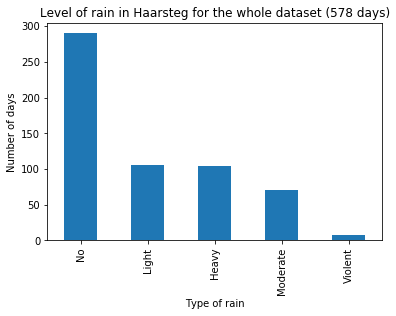

In [67]:
#just to see how many each of the events in Haarsteeg we have

all_areas2_days['Rain measure Haarsteeg'].value_counts().plot('bar')
plt.title("Level of rain in Haarsteg for the whole dataset (578 days)")
plt.ylabel('Number of days')
plt.xlabel('Type of rain')

Text(0.5, 0, 'Type of rain')

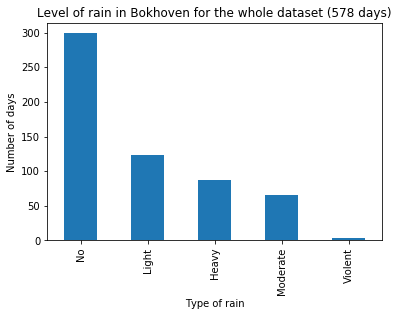

In [72]:
#just to see how many each of the events in Bokhoven we have

all_areas2_days['Rain measure Bokhoven'].value_counts().plot('bar')
plt.title("Level of rain in Bokhoven for the whole dataset (578 days)")
plt.ylabel('Number of days')
plt.xlabel('Type of rain')

In [ ]:
ax = sns.pointplot(x=linear_data.index, y=linear_data['y'], data=linear_data)
fg.axes[0,0].plot(linear_data.index, linear_data['y'], marker="o")

In [18]:
Haarsteeg = rain[["Haarsteeg_y", "Begin", "Rain measure Haarsteeg"]]
#Getting dates with no rain   
no_rain = set(Haarsteeg[Haarsteeg["Rain measure Haarsteeg"] == "No"]["Begin"].dt.date)
light_rain = set(Haarsteeg[Haarsteeg["Rain measure Haarsteeg"] == "Light"]["Begin"].dt.date)
moderate_rain = set(Haarsteeg[Haarsteeg["Rain measure Haarsteeg"] == "Moderate"]["Begin"].dt.date)
heavy_rain = set(Haarsteeg[Haarsteeg["Rain measure Haarsteeg"] == "Heavy"]["Begin"].dt.date)
violent_rain = set(Haarsteeg[Haarsteeg["Rain measure Haarsteeg"] == "Violent"]["Begin"].dt.date)
#Filtering on those dates
flow_filtered_no = flow[flow["datumBeginMeting"].dt.date.isin(no_rain)]
flow_filtered_light = flow[flow["datumBeginMeting"].dt.date.isin(light_rain)]
flow_filtered_moderate = flow[flow["datumBeginMeting"].dt.date.isin(moderate_rain)]
flow_filtered_heavy = flow[flow["datumBeginMeting"].dt.date.isin(heavy_rain)]
flow_filtered_violent = flow[flow["datumBeginMeting"].dt.date.isin(violent_rain)]

In [82]:
flow


,Unnamed: 0,datumBeginMeting,datumEindeMeting,datumMonster,historianEenheid,historianKwaliteit,historianTagnummer,hstWaarde
0,0,2018-01-06 23:59:00,2018-01-07 00:00:00,NaN,NaN,100,GBS_DB.RG8170/FT510/Debietmeting.Q,4.6
1,1,2018-01-06 23:58:00,2018-01-06 23:59:00,NaN,NaN,100,GBS_DB.RG8170/FT510/Debietmeting.Q,4.6
2,2,2018-01-06 23:57:00,2018-01-06 23:58:00,NaN,NaN,100,GBS_DB.RG8170/FT510/Debietmeting.Q,4.6
3,3,2018-01-06 23:56:00,2018-01-06 23:57:00,NaN,NaN,100,GBS_DB.RG8170/FT510/Debietmeting.Q,4.6
4,4,2018-01-06 23:55:00,2018-01-06 23:56:00,NaN,NaN,100,GBS_DB.RG8170/FT510/Debietmeting.Q,4.6
5,5,2018-01-06 23:54:00,2018-01-06 23:55:00,NaN,NaN,100,GBS_DB.RG8170/FT510/Debietmeting.Q,4.6
6,6,2018-01-06 23:53:00,2018-01-06 23:54:00,NaN,NaN,100,GBS_DB.RG8170/FT510/Debietmeting.Q,4.6
7,7,2018-01-06 23:52:00,2018-01-06 23:53:00,NaN,NaN,100,GBS_DB.RG8170/FT510/Debietmeting.Q,4.6
8,8,2018-01-06 23:51:00,2018-01-06 23:52:00,NaN,NaN,100,GBS_DB.RG8170/FT510/Debietmeting.Q,4.6
9,9,2018-01-06 23:50:00,2018-01-06 23:51:00,NaN,NaN,100,GBS_DB.RG8170/FT510/Debietmeting.Q,4.6


IndexError: too many indices for array

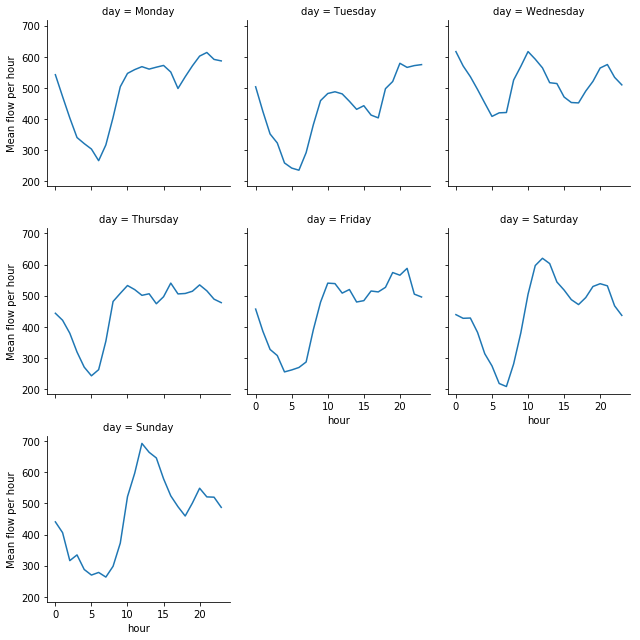

In [76]:
# Need to check if the flow between ""datumBeginMeting" and "datumEindMeting" is the average in that time period or what
# is the interpretation of the data exactly????
flow_filtered_no["day"] = flow_filtered_no["datumBeginMeting"].dt.day_name()
flow_filtered_no["hour"] = flow_filtered_no["datumBeginMeting"].dt.hour

g = sns.FacetGrid(data = flow.groupby([
        "day", "hour"
]).hstWaarde.mean().to_frame(name="Mean flow per hour").reset_index(), col="day", col_order=[
    
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday"
], col_wrap=3, hue='all of them')

g.map(sns.lineplot, "hour", "Mean flow per hour");

#From the plots below we can see, that the usage on Wednesday is the largest and that the Saturday and Sunday usage is
#almost the same. Monday Tuesday, Thursday and Friday are all smiliar as well, with friday evening having an extraordinary
#peek in the evening hours.

C:\Users\Kacper\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


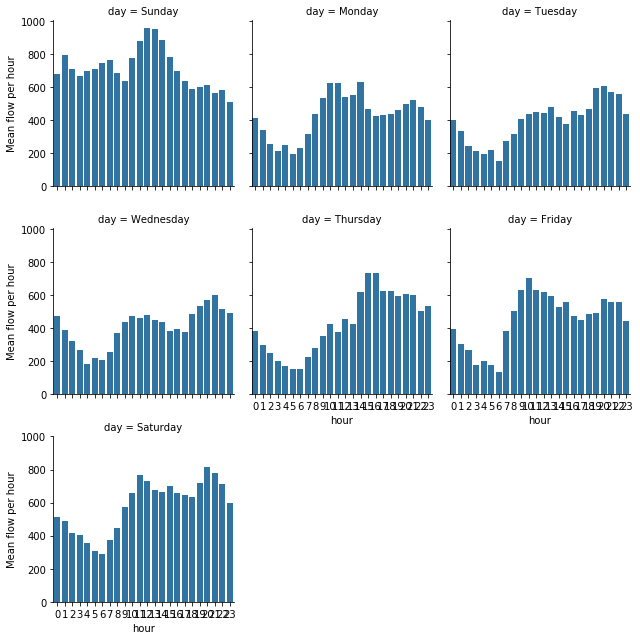

In [20]:
flow_filtered_light["day"] = flow_filtered_light["datumBeginMeting"].dt.day_name()
flow_filtered_light["hour"] = flow_filtered_light["datumBeginMeting"].dt.hour

g = sns.FacetGrid(data = flow_filtered_light.groupby([
        "day", "hour"
]).hstWaarde.mean().to_frame(name="Mean flow per hour").reset_index(), col="day", col_order=[
    "Sunday",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday"
], col_wrap=3)

g.map(sns.barplot, "hour", "Mean flow per hour");

C:\Users\Kacper\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


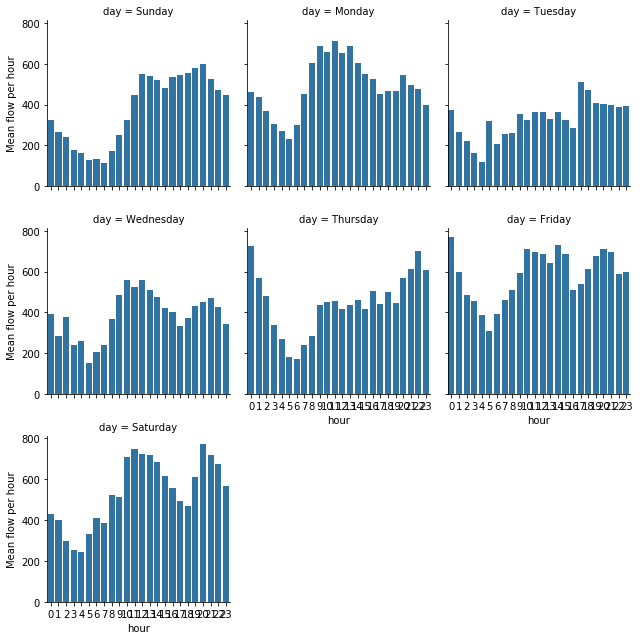

In [21]:
flow_filtered_moderate["day"] = flow_filtered_moderate["datumBeginMeting"].dt.day_name()
flow_filtered_moderate["hour"] = flow_filtered_moderate["datumBeginMeting"].dt.hour

g = sns.FacetGrid(data = flow_filtered_moderate.groupby([
        "day", "hour"
]).hstWaarde.mean().to_frame(name="Mean flow per hour").reset_index(), col="day", col_order=[
    "Sunday",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday"
], col_wrap=3)

g.map(sns.barplot, "hour", "Mean flow per hour");

C:\Users\Kacper\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


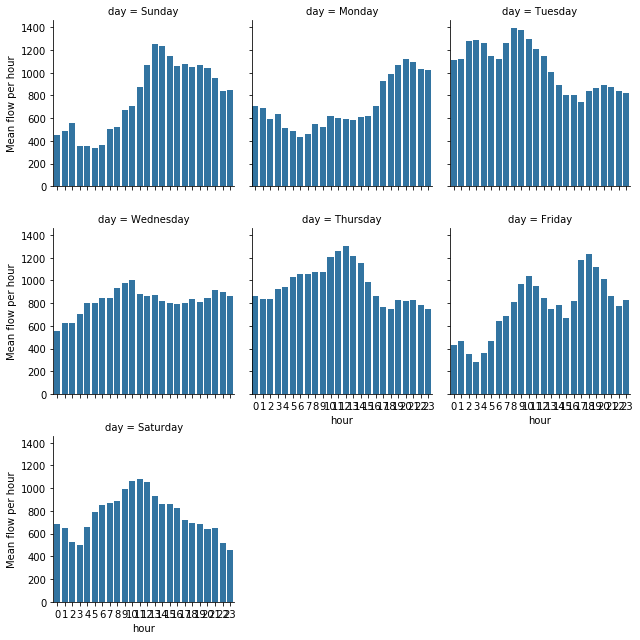

In [22]:
flow_filtered_heavy["day"] = flow_filtered_heavy["datumBeginMeting"].dt.day_name()
flow_filtered_heavy["hour"] = flow_filtered_heavy["datumBeginMeting"].dt.hour

g = sns.FacetGrid(data = flow_filtered_heavy.groupby([
        "day", "hour"
]).hstWaarde.mean().to_frame(name="Mean flow per hour").reset_index(), col="day", col_order=[
    "Sunday",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday"
], col_wrap=3)

g.map(sns.barplot, "hour", "Mean flow per hour");

C:\Users\Kacper\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


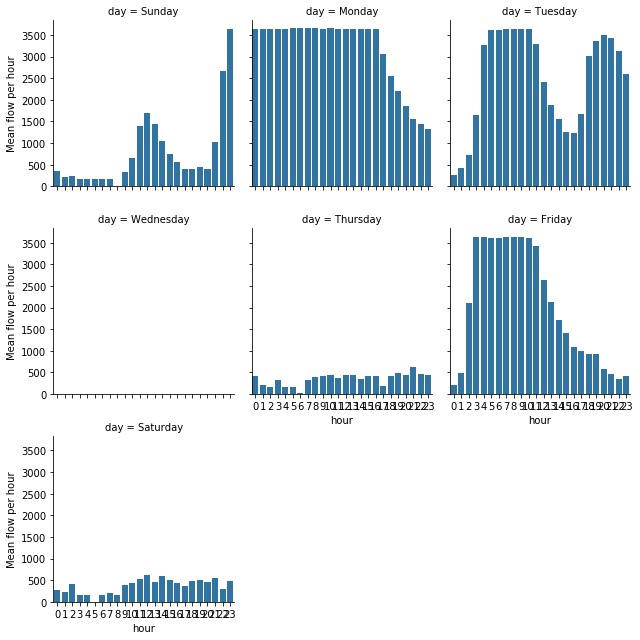

In [23]:
flow_filtered_violent["day"] = flow_filtered_violent["datumBeginMeting"].dt.day_name()
flow_filtered_violent["hour"] = flow_filtered_violent["datumBeginMeting"].dt.hour

g = sns.FacetGrid(data = flow_filtered_violent.groupby([
        "day", "hour"
]).hstWaarde.mean().to_frame(name="Mean flow per hour").reset_index(), col="day", col_order=[
    "Sunday",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday"
], col_wrap=3)

g.map(sns.barplot, "hour", "Mean flow per hour");

#no data for some days + maximum capacity of the pipes seems to be 3500 flow per hour

In [61]:
Bokhoven = rain[["Bokhoven_y", "Begin", "Rain measure Bokhoven"]]
#Getting dates with no rain   
no_rain = set(Bokhoven[Bokhoven["Rain measure Bokhoven"] == "No"]["Begin"].dt.date)
light_rain = set(Bokhoven[Bokhoven["Rain measure Bokhoven"] == "Light"]["Begin"].dt.date)
moderate_rain = set(Bokhoven[Bokhoven["Rain measure Bokhoven"] == "Moderate"]["Begin"].dt.date)
heavy_rain = set(Bokhoven[Bokhoven["Rain measure Bokhoven"] == "Heavy"]["Begin"].dt.date)
violent_rain = set(Bokhoven[Bokhoven["Rain measure Bokhoven"] == "Violent"]["Begin"].dt.date)
#Filtering on those dates
flow_filtered_no = flow[flow["datumBeginMeting"].dt.date.isin(no_rain)]
flow_filtered_light = flow[flow["datumBeginMeting"].dt.date.isin(light_rain)]
flow_filtered_moderate = flow[flow["datumBeginMeting"].dt.date.isin(moderate_rain)]
flow_filtered_heavy = flow[flow["datumBeginMeting"].dt.date.isin(heavy_rain)]
flow_filtered_violent = flow[flow["datumBeginMeting"].dt.date.isin(violent_rain)]

C:\Users\Kacper\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


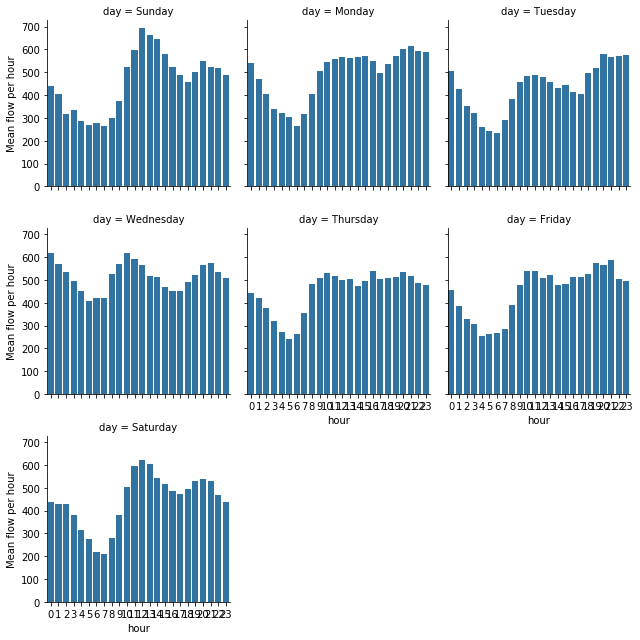

In [62]:
flow_filtered_no["day"] = flow_filtered_no["datumBeginMeting"].dt.day_name()
flow_filtered_no["hour"] = flow_filtered_no["datumBeginMeting"].dt.hour

g = sns.FacetGrid(data = flow_filtered_no.groupby([
        "day", "hour"
]).hstWaarde.mean().to_frame(name="Mean flow per hour").reset_index(), col="day", col_order=[
    "Sunday",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday"
], col_wrap=3)

g.map(sns.barplot, "hour", "Mean flow per hour");

C:\Users\Kacper\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


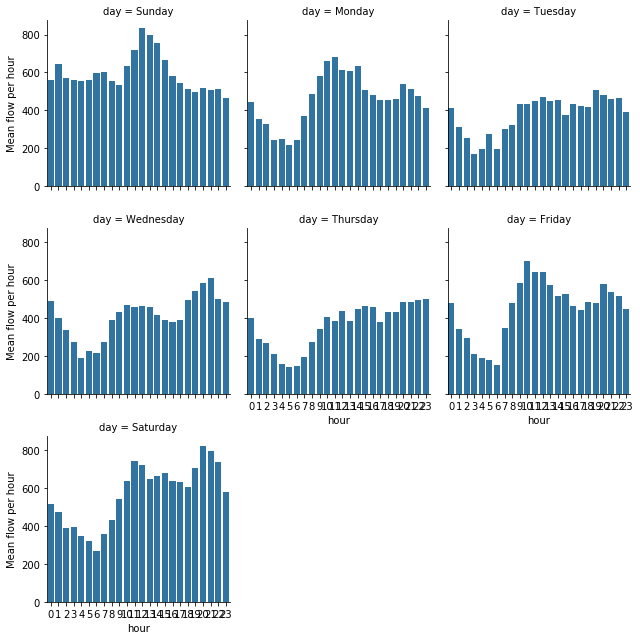

In [63]:
flow_filtered_light["day"] = flow_filtered_light["datumBeginMeting"].dt.day_name()
flow_filtered_light["hour"] = flow_filtered_light["datumBeginMeting"].dt.hour

g = sns.FacetGrid(data = flow_filtered_light.groupby([
        "day", "hour"
]).hstWaarde.mean().to_frame(name="Mean flow per hour").reset_index(), col="day", col_order=[
    "Sunday",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday"
], col_wrap=3)

g.map(sns.barplot, "hour", "Mean flow per hour");

C:\Users\Kacper\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


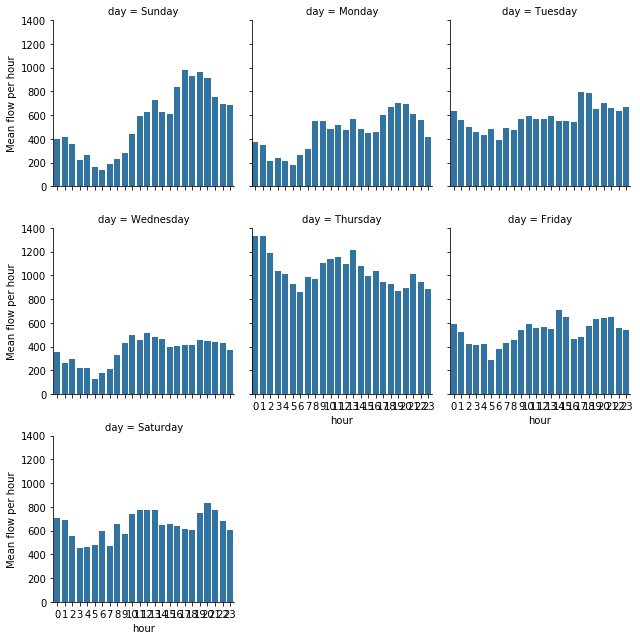

In [64]:
flow_filtered_moderate["day"] = flow_filtered_moderate["datumBeginMeting"].dt.day_name()
flow_filtered_moderate["hour"] = flow_filtered_moderate["datumBeginMeting"].dt.hour

g = sns.FacetGrid(data = flow_filtered_moderate.groupby([
        "day", "hour"
]).hstWaarde.mean().to_frame(name="Mean flow per hour").reset_index(), col="day", col_order=[
    "Sunday",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday"
], col_wrap=3)

g.map(sns.barplot, "hour", "Mean flow per hour");

C:\Users\Kacper\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


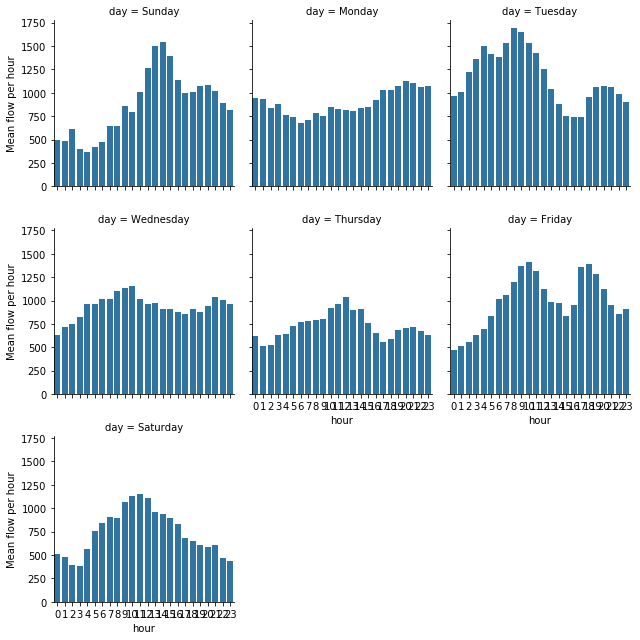

In [65]:
flow_filtered_heavy["day"] = flow_filtered_heavy["datumBeginMeting"].dt.day_name()
flow_filtered_heavy["hour"] = flow_filtered_heavy["datumBeginMeting"].dt.hour

g = sns.FacetGrid(data = flow_filtered_heavy.groupby([
        "day", "hour"
]).hstWaarde.mean().to_frame(name="Mean flow per hour").reset_index(), col="day", col_order=[
    "Sunday",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday"
], col_wrap=3)

g.map(sns.barplot, "hour", "Mean flow per hour");

C:\Users\Kacper\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


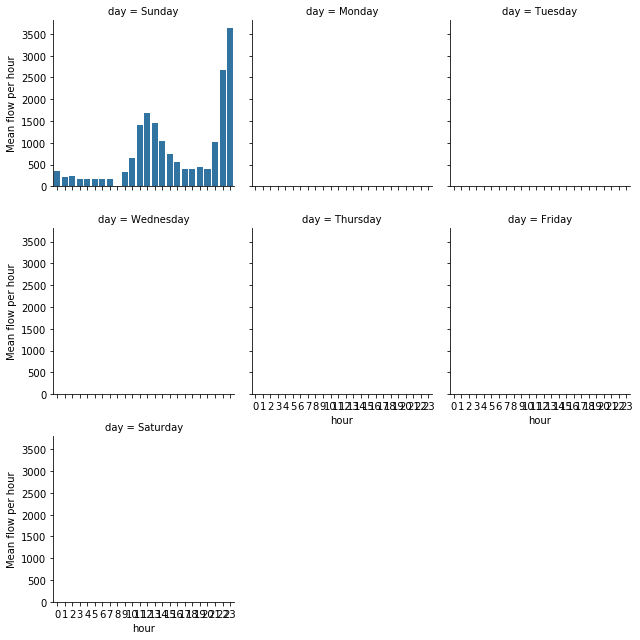

In [66]:
flow_filtered_violent["day"] = flow_filtered_violent["datumBeginMeting"].dt.day_name()
flow_filtered_violent["hour"] = flow_filtered_violent["datumBeginMeting"].dt.hour

g = sns.FacetGrid(data = flow_filtered_violent.groupby([
        "day", "hour"
]).hstWaarde.mean().to_frame(name="Mean flow per hour").reset_index(), col="day", col_order=[
    "Sunday",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday"
], col_wrap=3)

g.map(sns.barplot, "hour", "Mean flow per hour");

In [88]:
Haarsteeg = rain[["Haarsteeg_y", "Begin", "Rain measure Haarsteeg"]]
#Getting dates with no rain   
no_rain = set(Haarsteeg[Haarsteeg["Rain measure Haarsteeg"] == "No"]["Begin"].dt.date)
light_rain = set(Haarsteeg[Haarsteeg["Rain measure Haarsteeg"] == "Light"]["Begin"].dt.date)
moderate_rain = set(Haarsteeg[Haarsteeg["Rain measure Haarsteeg"] == "Moderate"]["Begin"].dt.date)
heavy_rain = set(Haarsteeg[Haarsteeg["Rain measure Haarsteeg"] == "Heavy"]["Begin"].dt.date)
violent_rain = set(Haarsteeg[Haarsteeg["Rain measure Haarsteeg"] == "Violent"]["Begin"].dt.date)
#Filtering on those dates
flow_filtered_no = flow[flow["datumBeginMeting"].dt.date.isin(no_rain)]
flow_filtered_light = flow[flow["datumBeginMeting"].dt.date.isin(light_rain)]
flow_filtered_moderate = flow[flow["datumBeginMeting"].dt.date.isin(moderate_rain)]
flow_filtered_heavy = flow[flow["datumBeginMeting"].dt.date.isin(heavy_rain)]
flow_filtered_violent = flow[flow["datumBeginMeting"].dt.date.isin(violent_rain)]

In [85]:
Haarsteeg["Rain measure Haarsteeg"].value_c

No          63960
Light       22008
Heavy       17760
Moderate    15349
Violent       960
Name: Rain measure Haarsteeg, dtype: int64

In [90]:
flow_filtered_no["Rain measure Haarsteeg"] = "No"
flow_filtered_light["Rain measure Haarsteeg"] = "Light"
flow_filtered_moderate["Rain measure Haarsteeg"] = "Moderate"
flow_filtered_heavy["Rain measure Haarsteeg"] = "Heavy"
flow_filtered_violent["Rain measure Haarsteeg"] = "Violent"
flow_comb = pd.concat([flow_filtered_no, flow_filtered_light, flow_filtered_moderate, flow_filtered_heavy, flow_filtered_violent])


In [93]:
flow_comb.shape

(790436, 11)

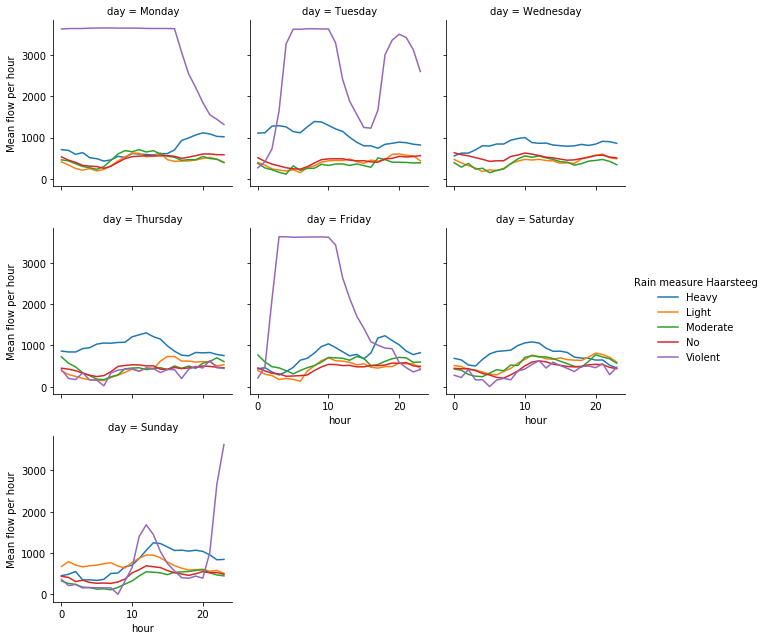

In [96]:

# Need to check if the flow between ""datumBeginMeting" and "datumEindMeting" is the average in that time period or what
# is the interpretation of the data exactly????
flow_comb["day"] = flow_comb["datumBeginMeting"].dt.day_name()
flow_comb["hour"] = flow_comb["datumBeginMeting"].dt.hour

g = sns.FacetGrid(hue='Rain measure Haarsteeg', data = flow_comb.groupby([
        "day", "hour", 'Rain measure Haarsteeg'
]).hstWaarde.mean().to_frame(name="Mean flow per hour").reset_index(), col="day", col_order=[
    
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday"
], col_wrap=3)

g.map(sns.lineplot, "hour", "Mean flow per hour");
g.add_legend()

#From the plots below we can see, that the usage on Wednesday is the largest and that the Saturday and Sunday usage is
#almost the same. Monday Tuesday, Thursday and Friday are all smiliar as well, with friday evening having an extraordinary
#peek in the evening hours.

In [ ]:
# Need to check if the flow between ""datumBeginMeting" and "datumEindMeting" is the average in that time period or what
# is the interpretation of the data exactly????
flow_filtered_no["day"] = flow_filtered_no["datumBeginMeting"].dt.day_name()
flow_filtered_no["hour"] = flow_filtered_no["datumBeginMeting"].dt.hour

g = sns.FacetGrid(data = flow.groupby([
        "day", "hour"
]).hstWaarde.mean().to_frame(name="Mean flow per hour").reset_index(), col="day", col_order=[
    
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday"
], col_wrap=3, hue='all of them')

g.map(sns.lineplot, "hour", "Mean flow per hour");

#From the plots below we can see, that the usage on Wednesday is the largest and that the Saturday and Sunday usage is
#almost the same. Monday Tuesday, Thursday and Friday are all smiliar as well, with friday evening having an extraordinary
#peek in the evening hours.